In [1]:
%matplotlib inline

In [2]:
import os
import sys
import glob

sys.path.append(os.path.join(os.environ["HOME"], "src", "git", "n10", "storage-eval", "analysis"))

import pandas
import numpy
import matplotlib

import n10storage.parse

In [3]:
results = []
for ior_file in glob.glob("../results.cgpu/ior-scaling/slurm-2798898.out"):
    results.append(n10storage.parse.IorOutput(open(ior_file, "r"), normalize_results=False))
ior_results = pandas.DataFrame.from_records(results[0]["summaries"])

In [4]:
results = []
for elb_file in glob.glob("../results.cgpu/elbencho-scaling/bw-direct-blockvarpct0.*threads.2798922.csv"):
    print("Loading {}".format(elb_file))
    results += n10storage.parse.ElbenchoCsvOutput(open(elb_file, "r"))["results"]
    #print(results[-1])
elb_results = pandas.DataFrame.from_records(results)
elb_results = elb_results[elb_results["access"] == "write"]

Loading ../results.cgpu/elbencho-scaling/bw-direct-blockvarpct0.04threads.2798922.csv
Loading ../results.cgpu/elbencho-scaling/bw-direct-blockvarpct0.01threads.2798922.csv
Loading ../results.cgpu/elbencho-scaling/bw-direct-blockvarpct0.16threads.2798922.csv
Loading ../results.cgpu/elbencho-scaling/bw-direct-blockvarpct0.02threads.2798922.csv
Loading ../results.cgpu/elbencho-scaling/bw-direct-blockvarpct0.08threads.2798922.csv
Loading ../results.cgpu/elbencho-scaling/bw-direct-blockvarpct0.32threads.2798922.csv
Loading ../results.cgpu/elbencho-scaling/bw-direct-blockvarpct0.24threads.2798922.csv


In [5]:
ior_results

,operation,max(mib),min(mib),mean(mib),stddev,max(ops),min(ops),mean(ops),mean(s),stonewall(s),...,reord,reordoff,reordrand,seed,segcnt,blksiz,xsize,aggs(mib),api,refnum
0,write,1388.47,1388.47,1388.47,0.0,1388.47,1388.47,1388.47,45.00645,None,...,0,1,0,0,1024,1073741824,1048576,62490.0,posix,0
1,write,2303.85,2303.85,2303.85,0.0,2303.85,2303.85,2303.85,45.01155,None,...,0,1,0,0,1024,1073741824,1048576,103700.0,posix,0
2,write,3500.99,3500.99,3500.99,0.0,3500.99,3500.99,3500.99,45.02841,None,...,0,1,0,0,1024,1073741824,1048576,157644.0,posix,0
3,write,4008.49,4008.49,4008.49,0.0,4008.49,4008.49,4008.49,45.12145,None,...,0,1,0,0,1024,1073741824,1048576,180869.0,posix,0
4,write,4418.22,4418.22,4418.22,0.0,4418.22,4418.22,4418.22,45.17813,None,...,0,1,0,0,1024,1073741824,1048576,199607.0,posix,0
5,write,5636.05,5636.05,5636.05,0.0,5636.05,5636.05,5636.05,45.44125,None,...,0,1,0,0,1024,1073741824,1048576,256109.0,posix,0
6,write,7019.75,7019.75,7019.75,0.0,7019.75,7019.75,7019.75,45.60901,None,...,0,1,0,0,1024,1073741824,1048576,320164.0,posix,0


In [6]:
elb_results

,start,access,ordering,bw(mib/s),iops,end,nodes,ppn,xfersize,nproc,...,rwmix read MiB [first],rwmix read MiB [last],rwmix read Ent lat us [min],rwmix read Ent lat us [avg],rwmix read Ent lat us [max],rwmix read IO lat us [min],rwmix read IO lat us [avg],rwmix read IO lat us [max],version,command
3,1.646856e+09,write,sequential,3782.0,3782.0,1.646856e+09,4,4,1048576,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1-0,/global/u2/g/glock/src/elbencho/bin.cgpu/elben...
7,1.646856e+09,write,sequential,1417.0,1417.0,1.646856e+09,4,1,1048576,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1-0,/global/u2/g/glock/src/elbencho/bin.cgpu/elben...
11,1.646856e+09,write,sequential,6073.0,6073.0,1.646856e+09,4,16,1048576,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1-0,/global/u2/g/glock/src/elbencho/bin.cgpu/elben...
15,1.646856e+09,write,sequential,2434.0,2434.0,1.646856e+09,4,2,1048576,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1-0,/global/u2/g/glock/src/elbencho/bin.cgpu/elben...
19,1.646856e+09,write,sequential,5191.0,5191.0,1.646856e+09,4,8,1048576,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1-0,/global/u2/g/glock/src/elbencho/bin.cgpu/elben...
23,1.646856e+09,write,sequential,5128.0,5128.0,1.646856e+09,4,32,1048576,128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1-0,/global/u2/g/glock/src/elbencho/bin.cgpu/elben...
27,1.646856e+09,write,sequential,6015.0,6015.0,1.646856e+09,4,24,1048576,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1-0,/global/u2/g/glock/src/elbencho/bin.cgpu/elben...


Text(0.5, 0, 'Processes per node')

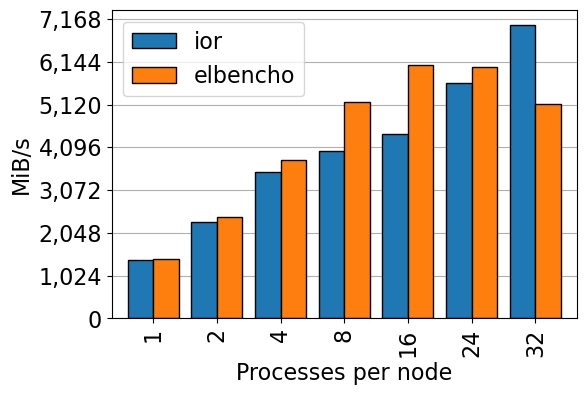

In [7]:
plot_df = pandas.concat([
    ior_results.set_index("tpn")[["max(mib)"]],
    elb_results.set_index("ppn")["bw(mib/s)"]
], axis="columns")
plot_df.columns = ["ior", "elbencho"]
ax = plot_df.plot.bar(width=0.80, edgecolor='black')
# ax = plot_df.sort_index().plot(marker='o')
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1024))
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
ax.yaxis.grid(True, which='major')
ax.set_axisbelow(True)
ax.set_ylabel("MiB/s")
ax.set_xlabel("Processes per node")